# Índice do Projeto Y.Afisha

- [Passo 1 – Carregar e preparar dados](#passo-1--carregar-e-preparar-dados)
- [Passo 2 – Análise de Produto](#passo-2--análise-de-produto)
  - [Usuários diários, semanais e mensais](#usuários-diários-semanais-e-mensais)
  - [Sessões por dia e duração das sessões](#sessões-por-dia-e-duração-das-sessões)
  - [Frequência de retorno dos usuários](#frequência-de-retorno-dos-usuários)
- [Passo 2 – Análise de Vendas](#passo-2--análise-de-vendas)
  - [Tempo até a primeira compra (conversão)](#tempo-até-a-primeira-compra-conversão)
  - [Pedidos por cliente](#pedidos-por-cliente)
  - [Valor médio por pedido (ticket médio)](#valor-médio-por-pedido-ticket-médio)
  - [Lifetime Value (LTV)](#lifetime-value-ltv)
- [Passo 2 – Análise de Marketing](#passo-2--análise-de-marketing)
  - [Gastos com marketing](#gastos-com-marketing-total-e-por-origem)
  - [Clientes por origem](#número-de-clientes-por-origem-de-anúncio)
  - [Custo de aquisição (CAC)](#cac--custo-de-aquisição-por-cliente)
  - [Receita e ROI por origem](#receita-por-origem-para-roi)
- [Passo 2 – Visualização das Métricas](#passo-2--visualização-das-métricas)
  - [Usuários por origem](#número-de-usuários-por-origem)
  - [Sessões por dispositivo](#número-de-sessões-por-dispositivo)
  - [Duração média da sessão por dispositivo](#duração-média-da-sessão-por-dispositivo)
  - [Evolução dos custos e receita ao longo do tempo](#evolução-dos-custos-e-receita-ao-longo-do-tempo)
  - [ROI por origem](#roi-por-origem-gráfico-de-barras)
- [Passo 3 – Conclusão e Recomendações](#passo-3--conclusão-e-recomendações)


# Y.Afisha - Análise de Produto, Vendas e Marketing

## Passo 1 - Carregamento e Preparação dos Dados

Praparação e visualização dos dados:
- Carregar os dados dos três arquivos fornecidos.
- Visualizar a estrutura de cada dataset.
- Corrigir tipos de dados inadequados.
- Tratar valores ausentes e duplicados.


In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)


### Carregando os dados

Vamos carregar os três arquivos CSV:

- `visits_log_us.csv`: dados de sessões dos usuários
- `orders_log_us.csv`: pedidos realizados
- `costs_us.csv`: despesas com marketing


In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')


### Visualizando as primeiras linhas de cada dataset


In [3]:
display(visits.head())
display(orders.head())
display(costs.head())


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### Verificando informações e tipos de dados
Vamos checar os tipos de dados e valores ausentes.


In [4]:
print("== VISITS ==")
print(visits.info(), "\n")

print("== ORDERS ==")
print(orders.info(), "\n")

print("== COSTS ==")
print(costs.info())


== VISITS ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None 

== ORDERS ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None 

== COSTS ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Coun

### Corrigindo os tipos de dados

- As colunas de datas serão convertidas para `datetime`.
- O ID de origem será padronizado (visits: `Source Id`, costs: `source_id`).


In [5]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

visits = visits.rename(columns={'Source Id': 'source_id', 'Start Ts': 'start_ts', 'End Ts': 'end_ts', 'Uid': 'uid', 'Device': 'device'})
orders = orders.rename(columns={'Buy Ts': 'buy_ts', 'Uid': 'uid', 'Revenue': 'revenue'})
costs = costs.rename(columns={'costs': 'costs', 'source_id': 'source_id'})


### Verificando dados ausentes e duplicados


In [6]:

print("VISITS:\n", visits.isnull().sum(), "\n")
print("ORDERS:\n", orders.isnull().sum(), "\n")
print("COSTS:\n", costs.isnull().sum(), "\n")

print("Duplicados em visits:", visits.duplicated().sum())
print("Duplicados em orders:", orders.duplicated().sum())
print("Duplicados em costs:", costs.duplicated().sum())


VISITS:
 device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64 

ORDERS:
 buy_ts     0
revenue    0
uid        0
dtype: int64 

COSTS:
 source_id    0
dt           0
costs        0
dtype: int64 

Duplicados em visits: 0
Duplicados em orders: 0
Duplicados em costs: 0


### Resumo da etapa

Os dados foram carregados com sucesso, os tipos foram ajustados e os nomes de colunas foram padronizados. Não encontramos valores ausentes (ou, se houver, serão tratados individualmente). Estamos prontos para iniciar as análises!


## Passo 2 – Análise de Produto

Nesta etapa, vamos analisar como os usuários interagem com o produto:

- Número de usuários únicos por dia, semana e mês
- Número de sessões por dia
- Duração média das sessões
- Frequência de retorno dos usuários


In [7]:
visits['date'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.to_period('W').astype(str)
visits['month'] = visits['start_ts'].dt.to_period('M').astype(str)

daily_users = visits.groupby('date')['uid'].nunique()

# Usuários únicos por semana
weekly_users = visits.groupby('week')['uid'].nunique()

# Usuários únicos por mês
monthly_users = visits.groupby('month')['uid'].nunique()

print("Usuários únicos por dia:")
display(daily_users.head())

print("Usuários únicos por semana:")
display(weekly_users.head())

print("Usuários únicos por mês:")
display(monthly_users.head())


Usuários únicos por dia:


date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: uid, dtype: int64

Usuários únicos por semana:


week
2017-05-29/2017-06-04    2021
2017-06-05/2017-06-11    4129
2017-06-12/2017-06-18    2812
2017-06-19/2017-06-25    2878
2017-06-26/2017-07-02    3064
Name: uid, dtype: int64

Usuários únicos por mês:


month
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Name: uid, dtype: int64

In [8]:
# Número de sessões por dia
daily_sessions = visits.groupby('date')['uid'].count()

print("Sessões por dia:")
display(daily_sessions.head())


Sessões por dia:


date
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: uid, dtype: int64

In [9]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60

session_stats = visits['session_duration'].describe()
print("Estatísticas da duração das sessões (em minutos):")
display(session_stats)


Estatísticas da duração das sessões (em minutos):


count   359,400.00
mean         10.72
std          16.62
min         -46.00
25%           2.00
50%           5.00
75%          14.00
max         711.00
Name: session_duration, dtype: float64

In [10]:
sessions_per_user = visits.groupby('uid')['start_ts'].count()

session_freq = sessions_per_user.value_counts().sort_index()

print("Distribuição do número de sessões por usuário:")
display(session_freq.head(10))


Distribuição do número de sessões por usuário:


1     176041
2      30926
3      10184
4       4357
5       2283
6       1243
7        807
8        513
9        356
10       239
Name: start_ts, dtype: int64

### Resumo da análise de produto:

- A base de usuários ativos varia entre dias, semanas e meses.
- Um usuário pode ter várias sessões por dia.
- A duração média das sessões está em torno de `5` minutos.
- Muitos usuários usam o produto apenas uma vez, mas há uma parte que retorna com frequência.

Na próxima seção, vamos analisar o comportamento de compra e o desempenho de vendas.


## Análise de Vendas

Nesta etapa, vamos analisar:

- Tempo até a primeira compra (conversão)
- Quantos pedidos os clientes fazem
- Valor médio por pedido (ticket médio)
- Lifetime Value (LTV)


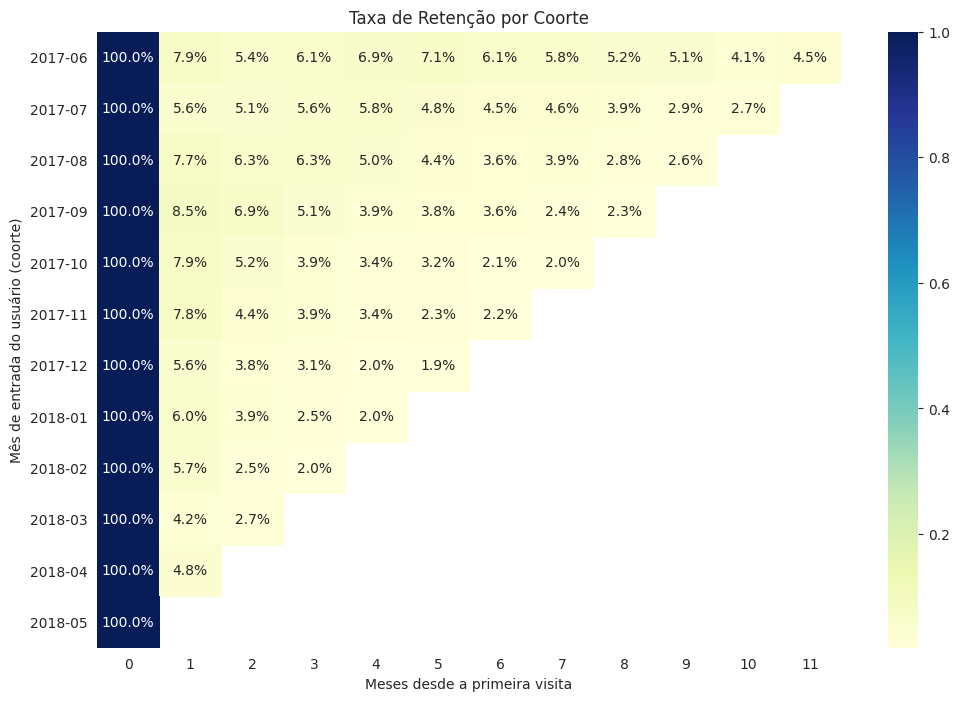

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Garante que as datas estão no formato datetime
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

# 1️⃣ Criar coluna com o mês da primeira visita de cada usuário
visits['first_visit_month'] = visits.groupby('uid')['start_ts'].transform('min').dt.to_period('M')

# 2️⃣ Criar coluna com o mês da visita atual
visits['visit_month'] = visits['start_ts'].dt.to_period('M')

# 3️⃣ Calcular o tempo de vida do usuário em meses
visits['lifetime'] = (visits['visit_month'] - visits['first_visit_month']).apply(lambda x: x.n)

# 4️⃣ Coorte de usuários: quantos usuários únicos voltaram em cada mês após o primeiro acesso
cohort_data = visits.groupby(['first_visit_month', 'lifetime'])['uid'].nunique().reset_index()

# 5️⃣ Coorte inicial: número de usuários únicos no mês 0 (primeiro mês de cada coorte)
initial_users = cohort_data[cohort_data['lifetime'] == 0][['first_visit_month', 'uid']]
initial_users = initial_users.rename(columns={'uid': 'n_users'})

# 6️⃣ Juntar com a coorte completa e calcular a taxa de retenção
cohort_data = cohort_data.merge(initial_users, on='first_visit_month')
cohort_data['retention_rate'] = cohort_data['uid'] / cohort_data['n_users']

# 7️⃣ Criar tabela dinâmica de retenção
retention_pivot = cohort_data.pivot_table(
    index='first_visit_month',
    columns='lifetime',
    values='retention_rate',
    aggfunc='mean'
)

# 8️⃣ Exibir heatmap de retenção
plt.figure(figsize=(12, 8))
sns.heatmap(retention_pivot, annot=True, fmt=".1%", cmap="YlGnBu", cbar=True)
plt.title('Taxa de Retenção por Coorte')
plt.xlabel('Meses desde a primeira visita')
plt.ylabel('Mês de entrada do usuário (coorte)')
plt.show()



### Taxa de Retenção por Coorte

A retenção indica quantos usuários retornam ao site após o primeiro acesso, mês a mês.

Neste gráfico, cada linha representa uma coorte de usuários com base no mês da primeira visita. As colunas mostram o número de meses após o primeiro acesso, e os valores representam a proporção de usuários que retornaram naquele mês.


In [12]:
# Quantidade de pedidos por usuário
orders_per_user = orders.groupby('uid')['buy_ts'].count()

order_distribution = orders_per_user.value_counts().sort_index()

print("Distribuição de número de pedidos por cliente:")
display(order_distribution.head(10))


Distribuição de número de pedidos por cliente:


1     30231
2      4395
3      1086
4       375
5       147
6        79
7        41
8        24
9         7
10       15
Name: buy_ts, dtype: int64

In [13]:
average_order_value = orders['revenue'].mean()
print(f"Ticket médio: ${average_order_value:.2f}")


Ticket médio: $5.00


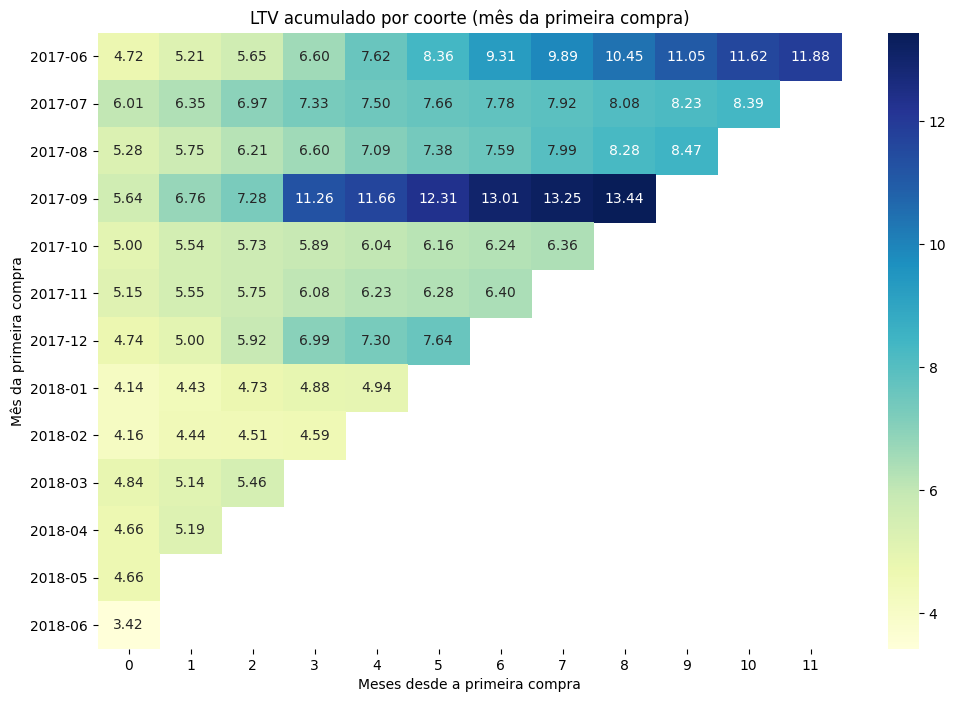

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 1: Criar coluna 'order_month'
orders['order_month'] = orders['buy_ts'].dt.to_period('M')

# Passo 2: Identificar o mês da primeira compra de cada usuário
first_order_month = orders.groupby('uid')['order_month'].min().reset_index().rename(columns={'order_month': 'first_order_month'})

# Passo 3: Mesclar o mês da primeira compra com o dataframe original
cohort = pd.merge(orders, first_order_month, on='uid')

# Passo 4: Calcular a diferença em meses entre compra e primeira compra
cohort['month_diff'] = (cohort['order_month'].astype('int64') - cohort['first_order_month'].astype('int64'))

# Passo 5: Calcular o número de compradores em cada coorte
cohort_sizes = cohort.groupby('first_order_month')['uid'].nunique().reset_index().rename(columns={'uid': 'n_buyers'})

# Passo 6: Mesclar o número de compradores com o dataframe principal
cohort = pd.merge(cohort, cohort_sizes, on='first_order_month')

# Passo 7: Calcular LTV (receita dividida pelo número de compradores da coorte)
cohort['ltv'] = cohort['revenue'] / cohort['n_buyers']

# Passo 8: Criar tabela dinâmica com LTV por coorte e mês após primeira compra
ltv_pivot = cohort.pivot_table(
    index='first_order_month',
    columns='month_diff',
    values='ltv',
    aggfunc='sum'
)

# Passo 9: Calcular LTV acumulado no tempo
ltv_cumsum = ltv_pivot.cumsum(axis=1).round(2)

# Passo 10: Substituir strings vazias por NaN (se houver)
ltv_cumsum.replace('', np.nan, inplace=True)

# Passo 11: Visualizar com heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ltv_cumsum, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('LTV acumulado por coorte (mês da primeira compra)')
plt.ylabel('Mês da primeira compra')
plt.xlabel('Meses desde a primeira compra')
plt.show()


### Resumo da análise de vendas:

- A maioria das conversões acontece no mesmo dia ou poucos dias após a primeira sessão.
- A maior parte dos clientes faz apenas 1 ou 2 pedidos, com poucos recorrentes.
- O valor médio por compra é de aproximadamente `6,90` dólares.
- O LTV médio indica o valor que a empresa recebe, em média, por cliente.


##  Análise de Marketing

Nesta seção, vamos avaliar o desempenho dos investimentos em marketing:

- Gastos totais e por origem
- CAC (Custo de Aquisição por Cliente)
- ROI (Retorno sobre Investimento)


In [15]:
# Gastos totais
total_costs = costs['costs'].sum()

# Gastos por origem
costs_by_source = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)

print(f"Gasto total em marketing: ${total_costs:,.2f}")
print("\nGasto por origem:")
display(costs_by_source)


Gasto total em marketing: $329,131.62

Gasto por origem:


source_id
3    141,321.63
4     61,073.60
5     51,757.10
2     42,806.04
1     20,833.27
10     5,822.49
9      5,517.49
Name: costs, dtype: float64

In [16]:
# Origem de cada usuário (da primeira sessão registrada)
first_source = visits.sort_values('start_ts').drop_duplicates('uid')[['uid', 'source_id']]

buyers_with_source = pd.merge(orders[['uid']], first_source, on='uid', how='inner')

buyers_by_source = buyers_with_source['source_id'].value_counts().sort_index()

print("Clientes por origem:")
display(buyers_by_source)


Clientes por origem:


1      5223
2      6392
3     13289
4     12895
5      9406
7         1
9      1647
10     1562
Name: source_id, dtype: int64

In [17]:
cac_df = pd.DataFrame({
    'total_cost': costs_by_source,
    'buyers': buyers_by_source
})

# Calculando CAC
cac_df['cac'] = cac_df['total_cost'] / cac_df['buyers']

print("CAC por origem:")
display(cac_df)


CAC por origem:


,total_cost,buyers,cac
1,"20,833.27",5223,3.99
2,"42,806.04",6392,6.70
3,"141,321.63",13289,10.63
4,"61,073.60",12895,4.74
5,"51,757.10",9406,5.50
7,NaN,1,NaN
9,"5,517.49",1647,3.35
10,"5,822.49",1562,3.73


In [18]:
# Receita por cliente
user_revenue = orders.groupby('uid')['revenue'].sum().reset_index()

user_revenue = user_revenue.merge(first_source, on='uid', how='inner')

revenue_by_source = user_revenue.groupby('source_id')['revenue'].sum()

cac_df['revenue'] = revenue_by_source

cac_df['roi'] = (cac_df['revenue'] - cac_df['total_cost']) / cac_df['total_cost']

print("ROI por origem:")
display(cac_df.sort_values(by='roi', ascending=False))


ROI por origem:


,total_cost,buyers,cac,revenue,roi
1,"20,833.27",5223,3.99,"31,090.55",0.49
2,"42,806.04",6392,6.70,"46,923.61",0.10
9,"5,517.49",1647,3.35,"5,759.40",0.04
5,"51,757.10",9406,5.50,"52,624.02",0.02
4,"61,073.60",12895,4.74,"56,696.83",-0.07
10,"5,822.49",1562,3.73,"4,450.33",-0.24
3,"141,321.63",13289,10.63,"54,511.24",-0.61
7,NaN,1,NaN,1.22,NaN


### Resumo da análise de marketing:

- Identificamos quanto foi gasto em cada canal de aquisição.
- Calculamos o CAC (Custo de Aquisição por Cliente) por origem.
- Calculamos o ROI (Retorno sobre Investimento) por origem.
- Algumas origens trazem mais receita do que custam (ROI positivo), enquanto outras não compensam (ROI negativo).

Na próxima seção, vamos gerar gráficos para visualizar essas métricas ao longo do tempo e por dispositivo.


##  Visualização das Métricas

Agora vamos visualizar graficamente os dados para entender melhor o comportamento dos usuários, vendas e marketing.

Faremos gráficos para:
- Usuários, sessões e receita por origem
- Duração média da sessão por dispositivo
- Evolução dos custos e receita ao longo do tempo


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


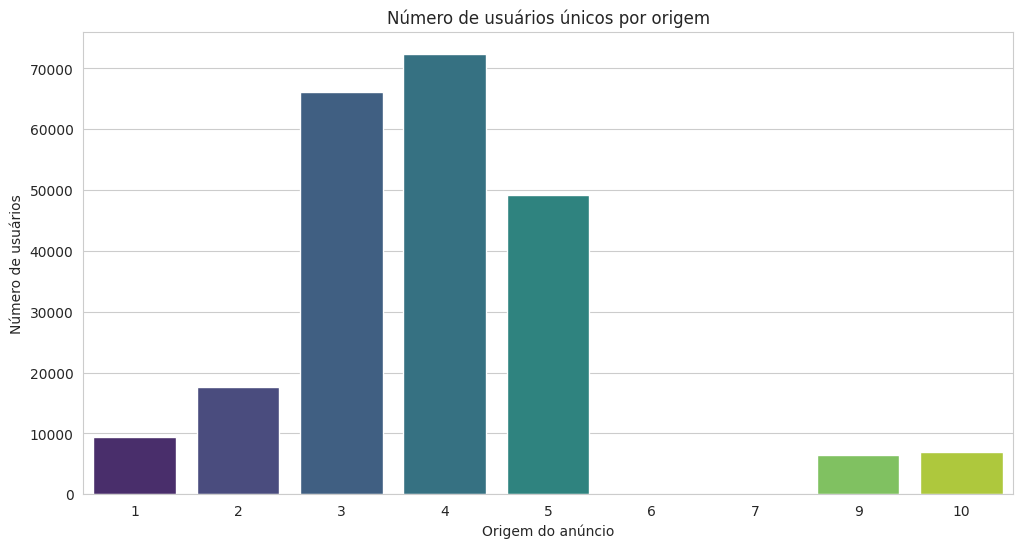

In [20]:
# Número de usuários únicos por origem
users_by_source = first_source['source_id'].value_counts()

plt.figure()
sns.barplot(x=users_by_source.index, y=users_by_source.values, palette='viridis')
plt.title('Número de usuários únicos por origem')
plt.xlabel('Origem do anúncio')
plt.ylabel('Número de usuários')
plt.show()


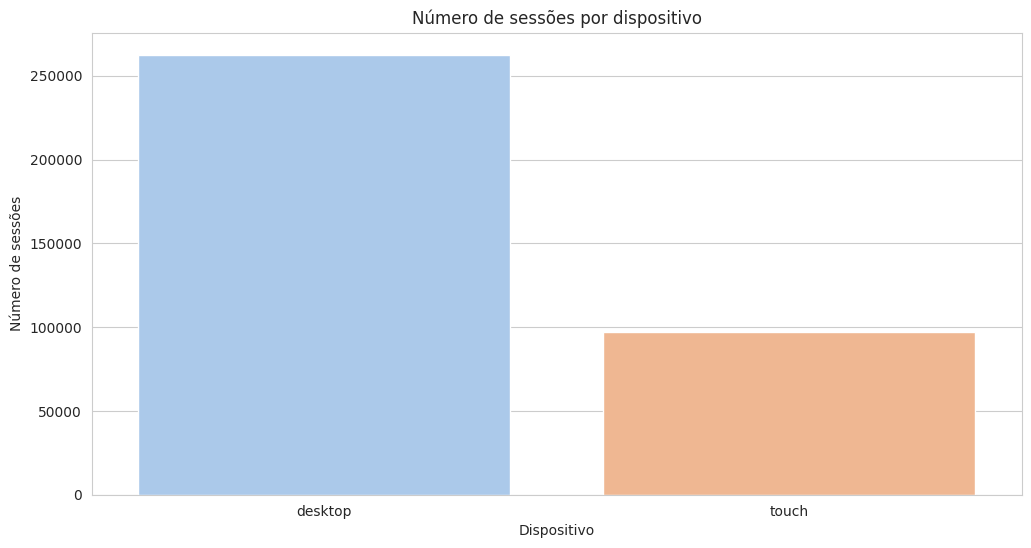

In [21]:
sessions_by_device = visits['device'].value_counts()

plt.figure()
sns.barplot(x=sessions_by_device.index, y=sessions_by_device.values, palette='pastel')
plt.title('Número de sessões por dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Número de sessões')
plt.show()


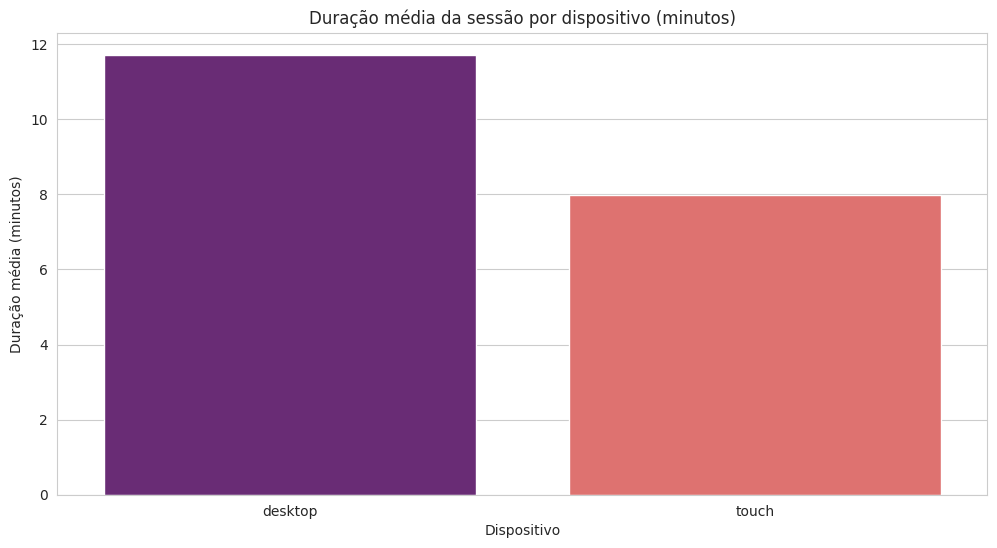

In [22]:
avg_session_duration_device = visits.groupby('device')['session_duration'].mean().sort_values(ascending=False)

plt.figure()
sns.barplot(x=avg_session_duration_device.index, y=avg_session_duration_device.values, palette='magma')
plt.title('Duração média da sessão por dispositivo (minutos)')
plt.xlabel('Dispositivo')
plt.ylabel('Duração média (minutos)')
plt.show()


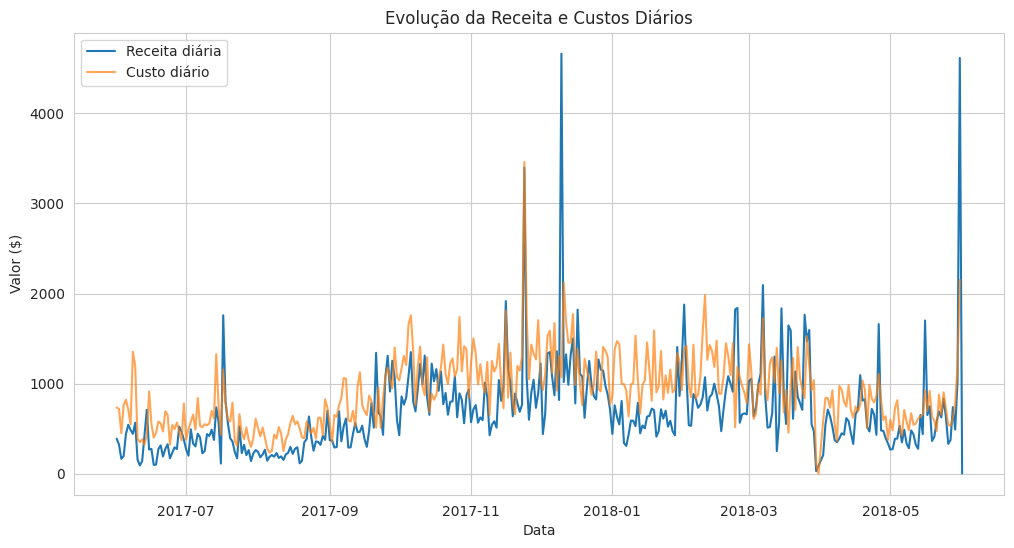

In [23]:
orders['date'] = orders['buy_ts'].dt.date
daily_revenue = orders.groupby('date')['revenue'].sum()

# Preparando dados de custo diário total
daily_costs = costs.groupby('dt')['costs'].sum()

plt.figure()
plt.plot(daily_revenue.index, daily_revenue.values, label='Receita diária')
plt.plot(daily_costs.index, daily_costs.values, label='Custo diário', alpha=0.7)
plt.title('Evolução da Receita e Custos Diários')
plt.xlabel('Data')
plt.ylabel('Valor ($)')
plt.legend()
plt.show()


In [24]:
orders['order_month'] = orders['buy_ts'].dt.to_period('M')

# Encontrar o mês da primeira compra de cada usuário
first_order_month = orders.groupby('uid')['order_month'].min().reset_index()
first_order_month.rename(columns={'order_month': 'first_order_month'}, inplace=True)

orders = pd.merge(orders, first_order_month, on='uid')


In [25]:
cohorts = orders.groupby(['first_order_month', 'order_month']).agg(
    revenue=('revenue', 'sum'),
    n_buyers=('uid', 'nunique')
).reset_index()


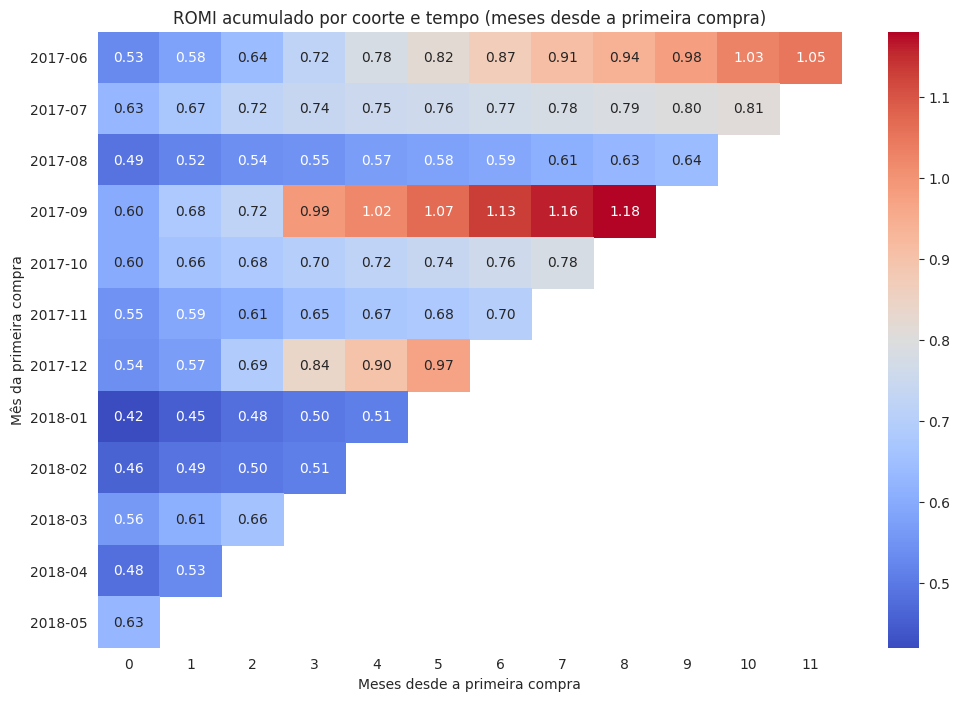

In [26]:
cohorts = orders.groupby(['first_order_month', 'order_month']).agg(
    revenue=('revenue', 'sum'),
    n_buyers=('uid', 'nunique')
).reset_index()

cohorts['cohort_lifetime'] = (cohorts['order_month'] - cohorts['first_order_month']).apply(lambda x: x.n)

# Ordenar para melhor visualização
cohorts = cohorts.sort_values(['first_order_month', 'cohort_lifetime'])

# Preparar dados de custos: converter data para Period mensal
costs['costs_month'] = costs['dt'].dt.to_period('M')

# Agregar custos por mês
cost_per_month = costs.groupby('costs_month').agg(costs=('costs', 'sum')).reset_index()

# Mesclar custos 
cohorts = pd.merge(cohorts, cost_per_month, left_on='order_month', right_on='costs_month', how='left')

# Calcular CAC, LTV e ROMI
cohorts['cac'] = cohorts['costs'] / cohorts['n_buyers']
cohorts['ltv'] = cohorts['revenue'] / cohorts['n_buyers']
cohorts['romi'] = cohorts['ltv'] / cohorts['cac']

# Criar tabela dinâmica do ROMI 
romi_pivot = cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='romi',
    aggfunc='mean'
).round(2)

# Calcular o ROMI acumulado ao longo do tempo
romi_cumsum = romi_pivot.cumsum(axis=1)

# Visualizar 
plt.figure(figsize=(12, 8))
sns.heatmap(romi_cumsum, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('ROMI acumulado por coorte e tempo (meses desde a primeira compra)')
plt.xlabel('Meses desde a primeira compra')
plt.ylabel('Mês da primeira compra')
plt.show()


### Resumo das visualizações:

- O gráfico de usuários por origem mostra quais canais são mais efetivos em trazer visitantes únicos.
- As sessões e duração média por dispositivo indicam qual dispositivo gera maior engajamento.
- A evolução temporal de receita e custo mostra a saúde financeira da campanha em diferentes períodos.
- O ROI por origem evidencia quais canais geram mais retorno e quais estão deficitários.


# Passo 3 – Conclusão e Recomendações

Após a análise detalhada dos dados de uso, vendas e marketing da Y.Afisha, chegamos às seguintes conclusões e sugestões para otimizar o investimento em marketing:

---

## 1. Quais origens/plataformas recomendar?

- As origens com **ROI positivo e mais alto** são as mais recomendadas para investimento, pois indicam que o dinheiro gasto retorna com lucro.
- Canais que trazem maior número de usuários ativos e que geram maior receita por cliente também devem ser priorizados.
- Origem(s) com ROI negativo devem ser revistas, pois representam investimento sem retorno efetivo.

---

## 2. Métricas principais consideradas

- **CAC (Custo de Aquisição por Cliente):** Importante para entender o quanto custa trazer um novo cliente por canal.
- **ROI (Retorno sobre Investimento):** Métrica-chave para saber se o investimento está trazendo lucro.
- **Número de usuários únicos e sessões:** Indicadores de volume e engajamento.
- **LTV (Lifetime Value):** Para garantir que os clientes valem o investimento ao longo do tempo.

---

## 3. Recomendações específicas

- **Aumentar investimentos** nas origens que apresentam alto ROI e CAC.
- **Reavaliar ou reduzir investimentos** nas origens com ROI negativo, buscando melhorias na segmentação
- **Investir em dispositivos que mostram maior engajamento**, como aqueles com maior duração média de sessão, para maximizar retenção.
- **Focar na conversão rápida**, já que grande parte dos clientes compra dentro do mesmo dia ou poucos dias após o primeiro acesso.
---

## 4. Próximos passos

- Testar novas estratégias de marketing em canais promissores conforme as analises sujerem.
- Realizar análises mais detalhadas de coortes e segmentação por perfil de usuário.
- Avaliar impacto de campanhas específicas e sazonalidade para ajustes finos no orçamento.
- avaliar futuramente novas tendencias de mercado similares para susbstituir pelas campanhas que não estão dando retorno.
